# Descriptive stats for Aggregate Health Change

### Gavin Qu, March 28th

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/combined_panel_data.dta')

df

,index,lf_stat,changejbstat,private,hrgpay,hrnpay,logpay,earnings,education,agghealth,pidp,wave
0,0,1,NA,0.0,6.923610,5.192707,1.934937,1200.000000,2.0,2.0,22445,d
1,1,1,0,0.0,9.037906,7.500577,2.201428,1566.449951,2.0,2.0,22445,e
2,2,1,0,0.0,14.323737,11.193169,2.661918,2482.590088,2.0,2.0,22445,f
3,3,1,0,0.0,16.251269,10.385414,2.788171,2816.669922,2.0,2.0,22445,g
4,4,1,0,0.0,16.732056,11.539349,2.817326,2900.000000,2.0,2.0,22445,h
...,...,...,...,...,...,...,...,...,...,...,...,...
533471,533471,1,NA,1.0,25.904050,18.372375,3.254399,4489.689941,NaN,2.0,1653277290,f
533472,533472,1,0,1.0,24.040330,23.078698,3.179733,4166.669922,NaN,2.0,1653277290,g
533473,533473,1,0,1.0,28.866778,19.615682,3.362691,5003.189941,NaN,2.0,1653277290,h
533474,533474,1,NA,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1653277290,i


#### Descriptive Stats
1.	Pay density plot split by health status
2.	Hours worked density plot split by health status
3.	Labour force status histogram split by health status

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

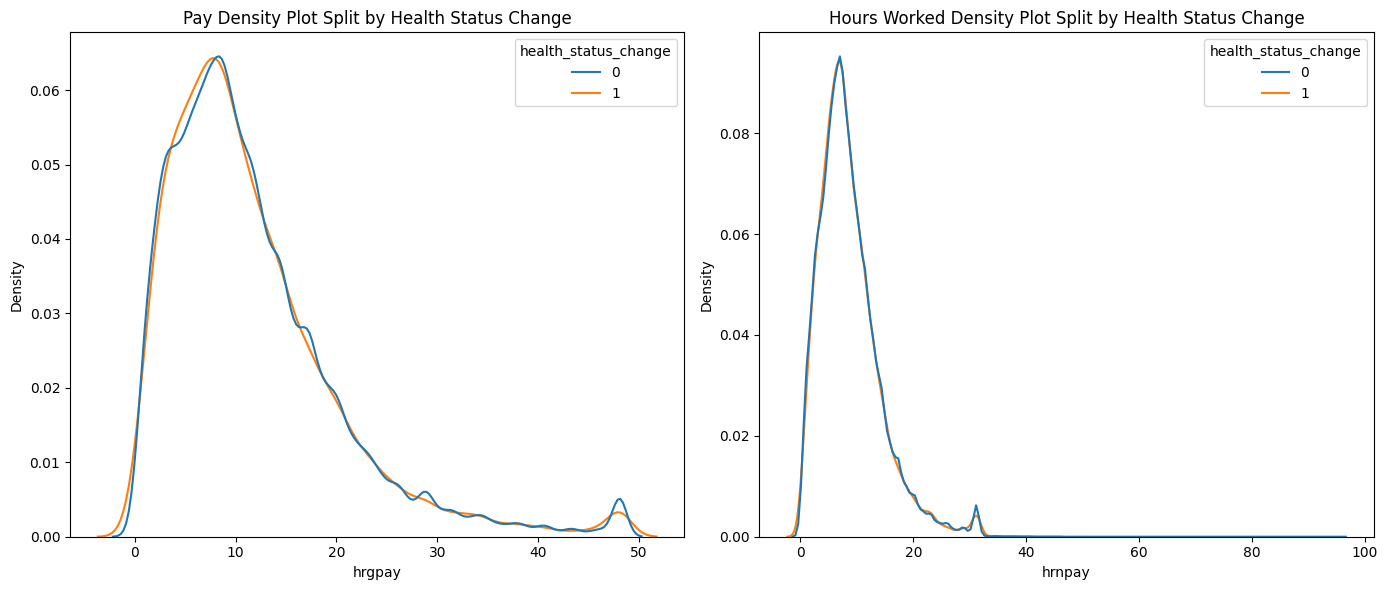

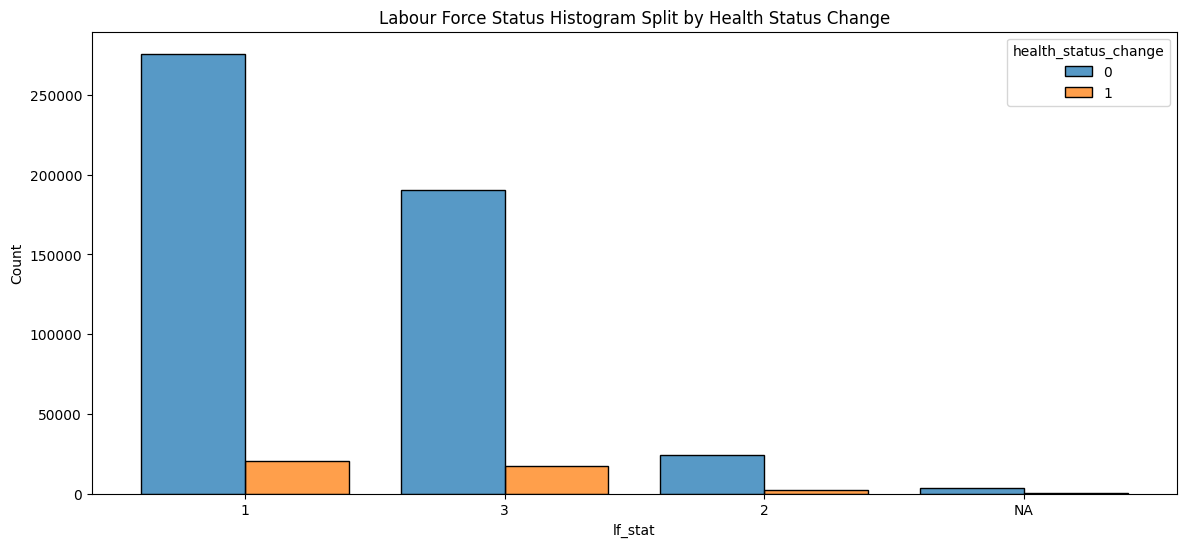

In [5]:
# First, prepare the health status change variable
df['prev_agghealth'] = df.groupby('pidp')['agghealth'].shift(1)
df['health_status_change'] = ((df['agghealth'] == 1) & (df['prev_agghealth'] == 2)).astype(int)

# 1. Pay density plot split by health status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='hrgpay', hue='health_status_change', common_norm=False)
plt.title('Pay Density Plot Split by Health Status Change')

# 2. Hours worked density plot split by health status
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='hrnpay', hue='health_status_change', common_norm=False)
plt.title('Hours Worked Density Plot Split by Health Status Change')

plt.tight_layout()
plt.show()

# 3. Labour force status histogram split by health status
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='lf_stat', hue='health_status_change', multiple="dodge", shrink=.8)
plt.title('Labour Force Status Histogram Split by Health Status Change')
plt.show()


#### Construct new dataframe with hcond, hcondn, and jbhrs

In [6]:
import pyreadstat
# use latin-1 encoding if UTF8 does not work
wave1, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta")
wave2, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta")
wave3, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/c_indresp.dta", encoding="iso-8859-1")
wave4, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta")
wave5, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/e_indresp.dta", encoding="iso-8859-1")
wave6, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta")
wave7, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/g_indresp.dta")
wave8, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/h_indresp.dta")
wave9, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/i_indresp.dta")
wave10, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/j_indresp.dta")
wave11, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/k_indresp.dta")
wave12, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/l_indresp.dta")
wave13, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/m_indresp.dta")

df1 = pd.DataFrame(wave1)
df2 = pd.DataFrame(wave2)
df3 = pd.DataFrame(wave3)
df4 = pd.DataFrame(wave4)
df5 = pd.DataFrame(wave5)
df6 = pd.DataFrame(wave6)
df7 = pd.DataFrame(wave7)
df8 = pd.DataFrame(wave8)
df9 = pd.DataFrame(wave9)
df10 = pd.DataFrame(wave10)
df11 = pd.DataFrame(wave11)
df12 = pd.DataFrame(wave12)
df13 = pd.DataFrame(wave13)